In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from copy import copy

In [2]:
stock_df = pd.read_csv ("../input/stockcsv/stock.csv")
stock_df.head()

Date       AAPL         BA          T    MGM        AMZN         IBM  \
0  2012-01-12  60.198570  75.510002  30.120001  12.13  175.929993  180.550003   
1  2012-01-13  59.972858  74.599998  30.070000  12.35  178.419998  179.160004   
2  2012-01-17  60.671429  75.239998  30.250000  12.25  181.660004  180.000000   
3  2012-01-18  61.301430  75.059998  30.330000  12.73  189.440002  181.070007   
4  2012-01-19  61.107143  75.559998  30.420000  12.80  194.449997  180.520004   

        TSLA        GOOG        sp500  
0  28.250000  313.644379  1295.500000  
1  22.790001  311.328064  1289.089966  
2  26.600000  313.116364  1293.670044  
3  26.809999  315.273285  1308.040039  
4  26.760000  318.590851  1314.500000

In [3]:
stock_df.describe()

AAPL           BA            T          MGM         AMZN  \
count  2159.000000  2159.000000  2159.000000  2159.000000  2159.000000   
mean    140.819823   189.942700    35.162899    23.105743   915.665665   
std      70.827601   103.678586     3.207490     6.963847   697.838905   
min      55.790001    67.239998    26.770000     7.140000   175.929993   
25%      89.165714   124.015000    33.040001    18.545000   316.490005   
50%     116.599998   142.419998    34.930000    23.780001   676.010010   
75%     175.019997   297.044998    37.419998    28.430000  1593.645019   
max     455.609985   440.619995    43.470001    38.029999  3225.000000   

               IBM         TSLA         GOOG        sp500  
count  2159.000000  2159.000000  2159.000000  2159.000000  
mean    161.853001   259.600815   783.712512  2218.749554  
std      25.561938   210.988003   334.448057   537.321727  
min      94.769997    22.790001   278.481171  1278.040039  
25%     142.769997   184.595001   527.214416  1847.984985  
50%     156.949997   231.960007   737.599976  2106.629883  
75%     185.974998   307.350006  1079.744995  2705.810059  
max     215.800003  1643.000000  1568.489990  3386.149902

### Plot the Data

In [4]:
def show_plot (df,fig_title):
    df.plot (x = 'Date', figsize = (15,8), title = fig_title, linewidth = 2)
    plt.grid()
    plt.show()

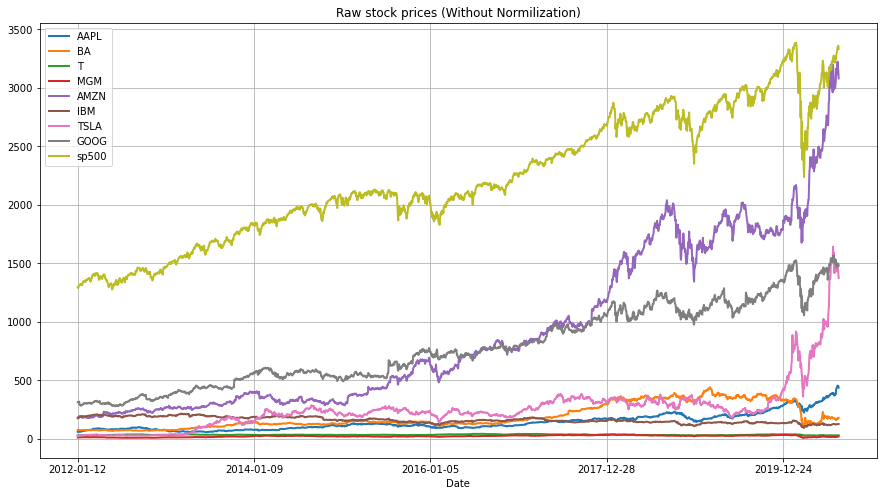

In [5]:
show_plot (stock_df, 'Raw stock prices (Without Normilization)')

### Normalizes the Data

In [6]:
stock_df

Date        AAPL          BA          T        MGM         AMZN  \
0     2012-01-12   60.198570   75.510002  30.120001  12.130000   175.929993   
1     2012-01-13   59.972858   74.599998  30.070000  12.350000   178.419998   
2     2012-01-17   60.671429   75.239998  30.250000  12.250000   181.660004   
3     2012-01-18   61.301430   75.059998  30.330000  12.730000   189.440002   
4     2012-01-19   61.107143   75.559998  30.420000  12.800000   194.449997   
...          ...         ...         ...        ...        ...          ...   
2154  2020-08-05  440.250000  174.279999  29.850000  16.719999  3205.030029   
2155  2020-08-06  455.609985  172.199997  29.840000  18.459999  3225.000000   
2156  2020-08-07  444.450012  170.020004  30.020000  19.030001  3167.459961   
2157  2020-08-10  450.910004  179.410004  30.200001  21.650000  3148.159912   
2158  2020-08-11  437.500000  180.130005  30.200001  21.500000  3080.669922   

             IBM         TSLA         GOOG        sp500  
0     180.550003    28.250000   313.644379  1295.500000  
1     179.160004    22.790001   311.328064  1289.089966  
2     180.000000    26.600000   313.116364  1293.670044  
3     181.070007    26.809999   315.273285  1308.040039  
4     180.520004    26.760000   318.590851  1314.500000  
...          ...          ...          ...          ...  
2154  125.449997  1485.020020  1473.609985  3327.770020  
2155  126.120003  1489.579956  1500.099976  3349.159912  
2156  124.959999  1452.709961  1494.489990  3351.280029  
2157  127.110001  1418.569946  1496.099976  3360.469971  
2158  126.750000  1374.390015  1480.319946  3333.689941  

[2159 rows x 10 columns]

In [7]:
def normalized (df):
    x = df.copy ()
    for i in x.columns [1:]:
        x[i] = x[i]/ x[i][0]
    return x

In [8]:
normalized(stock_df)

Date      AAPL        BA         T       MGM       AMZN       IBM  \
0     2012-01-12  1.000000  1.000000  1.000000  1.000000   1.000000  1.000000   
1     2012-01-13  0.996251  0.987949  0.998340  1.018137   1.014153  0.992301   
2     2012-01-17  1.007855  0.996424  1.004316  1.009893   1.032570  0.996954   
3     2012-01-18  1.018320  0.994040  1.006972  1.049464   1.076792  1.002880   
4     2012-01-19  1.015093  1.000662  1.009960  1.055235   1.105269  0.999834   
...          ...       ...       ...       ...       ...        ...       ...   
2154  2020-08-05  7.313297  2.308039  0.991036  1.378401  18.217644  0.694821   
2155  2020-08-06  7.568452  2.280493  0.990704  1.521847  18.331155  0.698532   
2156  2020-08-07  7.383066  2.251622  0.996680  1.568838  18.004093  0.692107   
2157  2020-08-10  7.490377  2.375977  1.002656  1.784831  17.894390  0.704016   
2158  2020-08-11  7.267614  2.385512  1.002656  1.772465  17.510772  0.702022   

           TSLA      GOOG     sp500  
0      1.000000  1.000000  1.000000  
1      0.806726  0.992615  0.995052  
2      0.941593  0.998317  0.998587  
3      0.949027  1.005193  1.009680  
4      0.947257  1.015771  1.014666  
...         ...       ...       ...  
2154  52.567080  4.698347  2.568715  
2155  52.728494  4.782805  2.585226  
2156  51.423361  4.764919  2.586862  
2157  50.214865  4.770052  2.593956  
2158  48.650974  4.719740  2.573284  

[2159 rows x 10 columns]

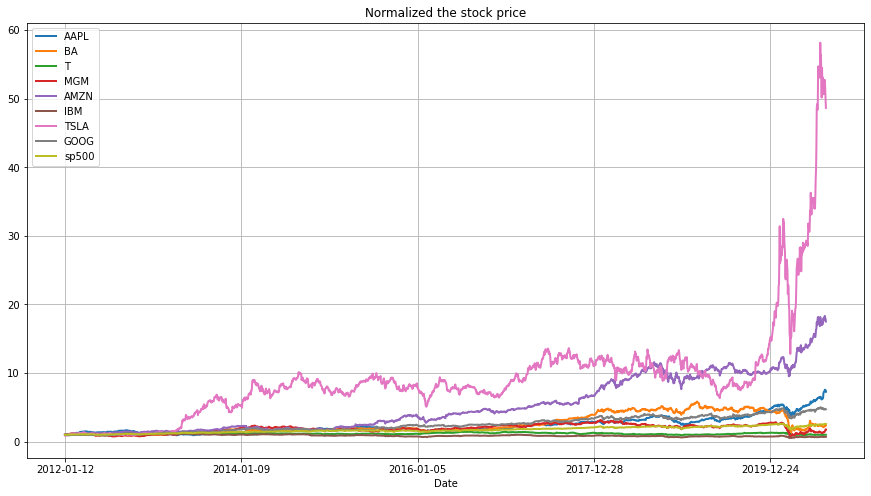

In [9]:
show_plot(normalized(stock_df) , 'Normalized the stock price')

### Perform the interactive data

In [10]:
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [11]:
def interactive_plot (df, title):
    fig = px.line(title = title)
    for i in df.columns[1:]:
        fig.add_scatter (x = df['Date'] ,y = df[i] ,name = i )
        
    fig.show()

In [12]:
interactive_plot (stock_df ,"Prices")

### Calculate indivudal stock daily return

In [13]:
df = stock_df['sp500']
df

0       1295.500000
1       1289.089966
2       1293.670044
3       1308.040039
4       1314.500000
           ...     
2154    3327.770020
2155    3349.159912
2156    3351.280029
2157    3360.469971
2158    3333.689941
Name: sp500, Length: 2159, dtype: float64

In [14]:
df_daily_return = df.copy()

for j in range (1,len(df)):
    df_daily_return [j] = ((df[j]-df[j-1]) / df[j-1] )* 100
    
df_daily_return [0] = 0
df_daily_return

0       0.000000
1      -0.494792
2       0.355295
3       1.110793
4       0.493866
          ...   
2154    0.642974
2155    0.642770
2156    0.063303
2157    0.274222
2158   -0.796913
Name: sp500, Length: 2159, dtype: float64

### Calculate multiple stock daily return

In [15]:
def daily_return (df):
    df_daily_retun = df.copy()
    
    
    for i in df.columns[1:]:
        
        for j in range (1,len(df)):
            df_daily_retun[i][j] = ((df[i][j] - df[i][j-1]) / df[i][j-1]) * 100
            
            
        df_daily_retun[i][0] = 0
        
    return df_daily_retun
    
    

In [16]:
stock_daily_return = daily_return (stock_df)
stock_daily_return

Date      AAPL        BA         T        MGM      AMZN       IBM  \
0     2012-01-12  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
1     2012-01-13 -0.374946 -1.205144 -0.166006   1.813685  1.415339 -0.769869   
2     2012-01-17  1.164812  0.857909  0.598603  -0.809717  1.815943  0.468852   
3     2012-01-18  1.038382 -0.239234  0.264463   3.918367  4.282725  0.594448   
4     2012-01-19 -0.316937  0.666134  0.296736   0.549882  2.644634 -0.303752   
...          ...       ...       ...       ...        ...       ...       ...   
2154  2020-08-05  0.362467  5.579446 -0.533156   0.000000  2.109065 -0.309917   
2155  2020-08-06  3.488923 -1.193483 -0.033501  10.406699  0.623082  0.534082   
2156  2020-08-07 -2.449458 -1.265966  0.603217   3.087768 -1.784187 -0.919762   
2157  2020-08-10  1.453480  5.522880  0.599604  13.767729 -0.609323  1.720552   
2158  2020-08-11 -2.973987  0.401316  0.000000  -0.692841 -2.143792 -0.283220   

           TSLA      GOOG     sp500  
0      0.000000  0.000000  0.000000  
1    -19.327430 -0.738516 -0.494792  
2     16.717854  0.574410  0.355295  
3      0.789470  0.688856  1.110793  
4     -0.186494  1.052283  0.493866  
...         ...       ...       ...  
2154  -0.133153  0.589774  0.642974  
2155   0.307062  1.797626  0.642770  
2156  -2.475194 -0.373974  0.063303  
2157  -2.350092  0.107728  0.274222  
2158  -3.114399 -1.054744 -0.796913  

[2159 rows x 10 columns]

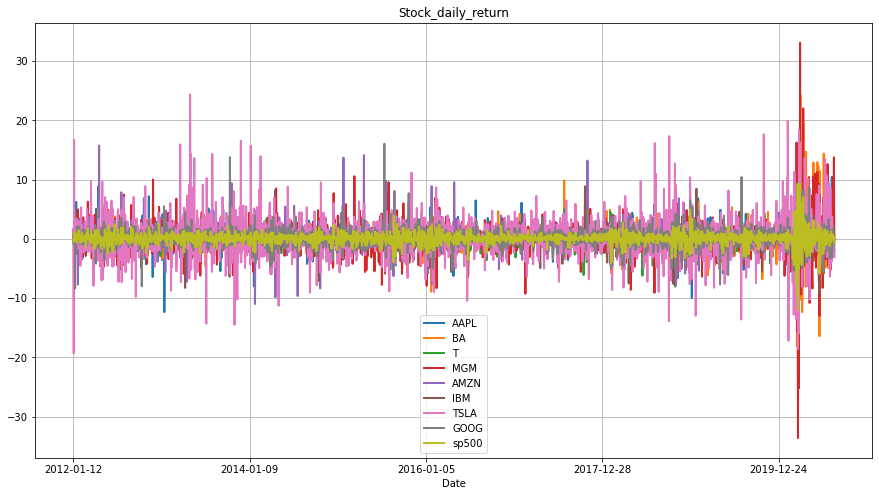

In [17]:
show_plot (stock_daily_return , "Stock_daily_return")

In [18]:
interactive_plot(stock_daily_return , "Interactive_plot")

### Calculate the correlation of Daily Return 

In [19]:
cm = stock_daily_return.drop (columns = ['Date']).corr()

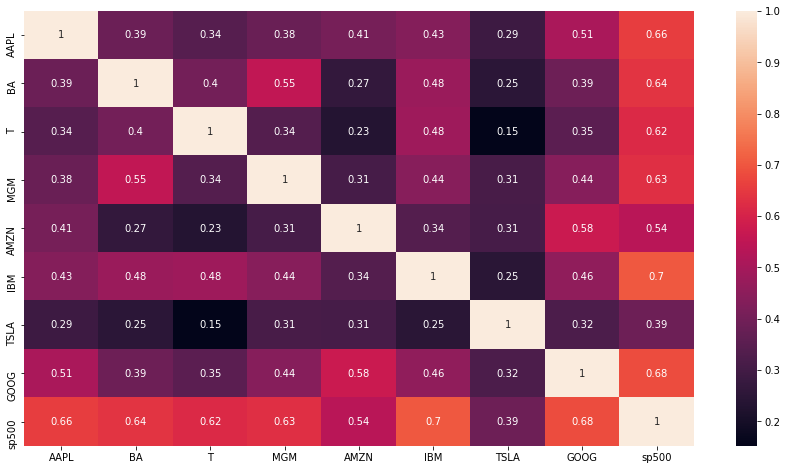

In [20]:
plt.figure (figsize = (15,8))
sns.heatmap (cm,annot = True)

### Plot the Histrogram on Daily Return

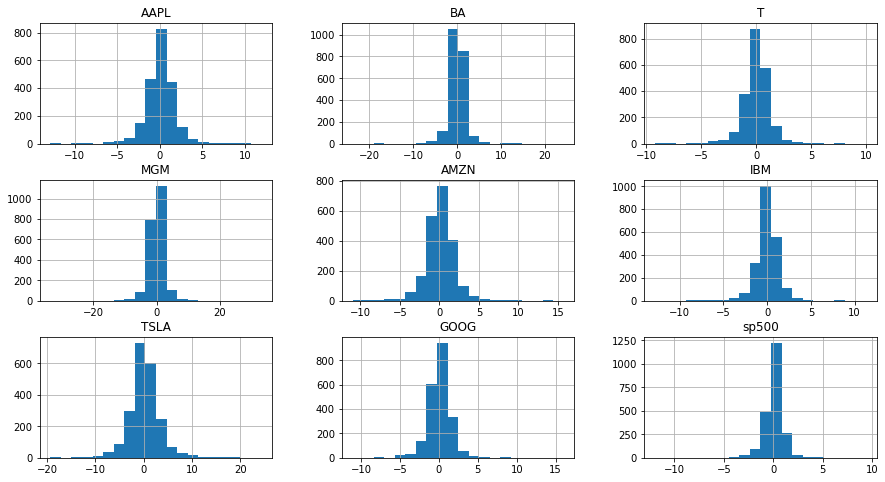

In [21]:
stock_daily_return.hist(figsize =(15,8),bins = 20);

In [22]:
df_hist = stock_daily_return.copy()
df_hist = df_hist.drop(columns = ['Date']) 

data = []

for i in df_hist.columns:
    data.append (stock_daily_return[i].values)
    
data



[array([ 0.        , -0.37494578,  1.16481192, ..., -2.44945751,
         1.45347999, -2.9739868 ]),
 array([ 0.        , -1.20514366,  0.85790887, ..., -1.26596576,
         5.52287953,  0.40131597]),
 array([ 0.        , -0.16600597,  0.59860326, ...,  0.60321716,
         0.5996036 ,  0.        ]),
 array([ 0.        ,  1.81368508, -0.8097166 , ...,  3.08776831,
        13.76772918, -0.69284065]),
 array([ 0.        ,  1.41533854,  1.8159433 , ..., -1.78418726,
        -0.60932259, -2.14379167]),
 array([ 0.        , -0.76986928,  0.46885241, ..., -0.91976211,
         1.72055219, -0.28322004]),
 array([  0.        , -19.32743009,  16.71785359, ...,  -2.47519409,
         -2.35009162,  -3.1143992 ]),
 array([ 0.        , -0.73851634,  0.57441015, ..., -0.37397414,
         0.10772812, -1.05474435]),
 array([ 0.        , -0.49479228,  0.35529545, ...,  0.06330295,
         0.27422185, -0.79691324])]

In [23]:
fig = ff.create_distplot(data,df_hist.columns)
fig.show()

### Perform the Random asset allocation and Calculate the Portfolio of Daily Return

#### Create the Weight Normalize The stock values****

In [24]:
np.random.seed (101)
weights = np.array(np.random.random(9))
weights

array([0.51639863, 0.57066759, 0.02847423, 0.17152166, 0.68527698,
       0.83389686, 0.30696622, 0.89361308, 0.72154386])

In [25]:
weights = weights / np.sum (weights)
weights

array([0.10921307, 0.12069041, 0.00602201, 0.03627509, 0.14492913,
       0.17636073, 0.06492024, 0.1889901 , 0.15259921])

In [26]:
df_protfolio = normalized(stock_df)
df_protfolio
df_protfolio.columns [1:]

Index(['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG', 'sp500'], dtype='object')

#### Note that enumarate return the values

In [27]:
for counter, stock in enumerate (df_protfolio.columns [1:]):
    df_protfolio[stock] = df_protfolio [stock] * weights[counter]
    df_protfolio [stock] = df_protfolio [stock]*1000000
    
df_protfolio

Date           AAPL             BA            T           MGM  \
0     2012-01-12  109213.072967  120690.407490  6022.010143  36275.090893   
1     2012-01-13  108803.583155  119235.914699  6012.013247  36933.006803   
2     2012-01-17  110070.940263  120258.850187  6048.001354  36633.954117   
3     2012-01-18  111213.896735  119971.149581  6063.996069  38069.407013   
4     2012-01-19  110861.418590  120770.317932  6081.990122  38278.743893   
...          ...            ...            ...          ...           ...   
2154  2020-08-05  798707.600095  278558.118654  5968.027783  50001.606220   
2155  2020-08-06  826573.895966  275233.575119  5966.028443  55205.122968   
2156  2020-08-07  806327.319584  271749.212299  6002.016551  56909.729263   
2157  2020-08-10  818047.125846  286757.593922  6038.004858  64744.906663   
2158  2020-08-11  793718.512304  287908.397945  6038.004858  64296.327633   

              AMZN            IBM          TSLA           GOOG          sp500  
0     1.449291e+05  176360.729910  6.492024e+04  188990.104235  152599.209597  
1     1.469804e+05  175002.982837  5.237283e+04  187594.381427  151844.160487  
2     1.496495e+05  175823.488543  6.112844e+04  188671.942595  152383.655881  
3     1.560585e+05  176868.668340  6.161103e+04  189971.620676  154076.322712  
4     1.601857e+05  176331.426972  6.149613e+04  191970.659033  154837.252810  
...            ...            ...           ...            ...            ...  
2154  2.640267e+06  122539.200612  3.412668e+06  887941.003611  391983.847760  
2155  2.656718e+06  123193.660569  3.423147e+06  903902.858806  394503.400529  
2156  2.609318e+06  122060.571958  3.338417e+06  900522.495854  394753.132817  
2157  2.593418e+06  124160.687803  3.259961e+06  901492.611827  395835.632149  
2158  2.537821e+06  123809.039849  3.158433e+06  891984.169418  392681.165603  

[2159 rows x 10 columns]

In [28]:
weights

array([0.10921307, 0.12069041, 0.00602201, 0.03627509, 0.14492913,
       0.17636073, 0.06492024, 0.1889901 , 0.15259921])

### Portfolio allocation = Daily Return/ Worth Calculation

In [29]:
def portfolio_allocation (df,weights):
    df_protfolio = df.copy()
    df_protfolio = normalized(df_protfolio)
    
    for counter, stock in enumerate (df_protfolio.columns [1:]):
        df_protfolio[stock] = df_protfolio [stock] * weights[counter]
        df_protfolio [stock] = df_protfolio [stock]*1000000
        
    df_protfolio ['Portfolio daily Worth $'] = df_protfolio [df_protfolio != 'Date'].sum(axis = 1)
    
    df_protfolio ['Daily % Return'] = 0.0000
    
    for i in range (1,len(stock_df)):
        df_protfolio ['Daily % Return'][i] = ( ( df_protfolio ['Portfolio daily Worth $'][i] -  df_protfolio ['Portfolio daily Worth $'][i-1])
                                              /  df_protfolio ['Portfolio daily Worth $'][i-1]) * 100
        
        
        
    df_protfolio ['Daily % Return'][0] = 0
    
    return df_protfolio
    

In [30]:
df_protfolio = portfolio_allocation(stock_df , weights)
df_protfolio

Date           AAPL             BA            T           MGM  \
0     2012-01-12  109213.072967  120690.407490  6022.010143  36275.090893   
1     2012-01-13  108803.583155  119235.914699  6012.013247  36933.006803   
2     2012-01-17  110070.940263  120258.850187  6048.001354  36633.954117   
3     2012-01-18  111213.896735  119971.149581  6063.996069  38069.407013   
4     2012-01-19  110861.418590  120770.317932  6081.990122  38278.743893   
...          ...            ...            ...          ...           ...   
2154  2020-08-05  798707.600095  278558.118654  5968.027783  50001.606220   
2155  2020-08-06  826573.895966  275233.575119  5966.028443  55205.122968   
2156  2020-08-07  806327.319584  271749.212299  6002.016551  56909.729263   
2157  2020-08-10  818047.125846  286757.593922  6038.004858  64744.906663   
2158  2020-08-11  793718.512304  287908.397945  6038.004858  64296.327633   

              AMZN            IBM          TSLA           GOOG          sp500  \
0     1.449291e+05  176360.729910  6.492024e+04  188990.104235  152599.209597   
1     1.469804e+05  175002.982837  5.237283e+04  187594.381427  151844.160487   
2     1.496495e+05  175823.488543  6.112844e+04  188671.942595  152383.655881   
3     1.560585e+05  176868.668340  6.161103e+04  189971.620676  154076.322712   
4     1.601857e+05  176331.426972  6.149613e+04  191970.659033  154837.252810   
...            ...            ...           ...            ...            ...   
2154  2.640267e+06  122539.200612  3.412668e+06  887941.003611  391983.847760   
2155  2.656718e+06  123193.660569  3.423147e+06  903902.858806  394503.400529   
2156  2.609318e+06  122060.571958  3.338417e+06  900522.495854  394753.132817   
2157  2.593418e+06  124160.687803  3.259961e+06  901492.611827  395835.632149   
2158  2.537821e+06  123809.039849  3.158433e+06  891984.169418  392681.165603   

      Portfolio daily Worth $  Daily % Return  
0                1.000000e+06        0.000000  
1                9.847792e+05       -1.522076  
2                1.000669e+06        1.613507  
3                1.013905e+06        1.322705  
4                1.020814e+06        0.681427  
...                       ...             ...  
2154             8.588634e+06        0.879605  
2155             8.664444e+06        0.882669  
2156             8.506059e+06       -1.827981  
2157             8.450456e+06       -0.653686  
2158             8.256690e+06       -2.292973  

[2159 rows x 12 columns]

## Perform Portfolio Data Visulization

### Plot of daily visulation

In [31]:
fig = px.line (x= df_protfolio.Date , y = df_protfolio['Daily % Return'] , title = 'Portfolio Daily % Return')
fig.show()

### plot of all stocks

In [32]:
interactive_plot(df_protfolio.drop (['Portfolio daily Worth $','Daily % Return'] , axis = 1),title = 'Portfolio Individule Stock  Worth in $ Overtime ')

### print Out Histogram and Daily return

In [33]:
fig = px.histogram (df_protfolio,x = "Daily % Return")
fig.show()

## Return the code with various value and  Visulize the final value

In [34]:
fig = px.line(x = df_protfolio['Date'], y = df_protfolio['Portfolio daily Worth $'], title = 'Portfolio Overall Worth in $')
fig.show()

# Calculate Portfolio Statistical Metrics(Cummulative Return, Sharp Ratio and Average Daily Return)

## Cummulative Return of the Portfolio

In [35]:
df_protfolio 

Date           AAPL             BA            T           MGM  \
0     2012-01-12  109213.072967  120690.407490  6022.010143  36275.090893   
1     2012-01-13  108803.583155  119235.914699  6012.013247  36933.006803   
2     2012-01-17  110070.940263  120258.850187  6048.001354  36633.954117   
3     2012-01-18  111213.896735  119971.149581  6063.996069  38069.407013   
4     2012-01-19  110861.418590  120770.317932  6081.990122  38278.743893   
...          ...            ...            ...          ...           ...   
2154  2020-08-05  798707.600095  278558.118654  5968.027783  50001.606220   
2155  2020-08-06  826573.895966  275233.575119  5966.028443  55205.122968   
2156  2020-08-07  806327.319584  271749.212299  6002.016551  56909.729263   
2157  2020-08-10  818047.125846  286757.593922  6038.004858  64744.906663   
2158  2020-08-11  793718.512304  287908.397945  6038.004858  64296.327633   

              AMZN            IBM          TSLA           GOOG          sp500  \
0     1.449291e+05  176360.729910  6.492024e+04  188990.104235  152599.209597   
1     1.469804e+05  175002.982837  5.237283e+04  187594.381427  151844.160487   
2     1.496495e+05  175823.488543  6.112844e+04  188671.942595  152383.655881   
3     1.560585e+05  176868.668340  6.161103e+04  189971.620676  154076.322712   
4     1.601857e+05  176331.426972  6.149613e+04  191970.659033  154837.252810   
...            ...            ...           ...            ...            ...   
2154  2.640267e+06  122539.200612  3.412668e+06  887941.003611  391983.847760   
2155  2.656718e+06  123193.660569  3.423147e+06  903902.858806  394503.400529   
2156  2.609318e+06  122060.571958  3.338417e+06  900522.495854  394753.132817   
2157  2.593418e+06  124160.687803  3.259961e+06  901492.611827  395835.632149   
2158  2.537821e+06  123809.039849  3.158433e+06  891984.169418  392681.165603   

      Portfolio daily Worth $  Daily % Return  
0                1.000000e+06        0.000000  
1                9.847792e+05       -1.522076  
2                1.000669e+06        1.613507  
3                1.013905e+06        1.322705  
4                1.020814e+06        0.681427  
...                       ...             ...  
2154             8.588634e+06        0.879605  
2155             8.664444e+06        0.882669  
2156             8.506059e+06       -1.827981  
2157             8.450456e+06       -0.653686  
2158             8.256690e+06       -2.292973  

[2159 rows x 12 columns]

In [36]:
df_protfolio ['Portfolio daily Worth $'][-1:]

2158    8.256690e+06
Name: Portfolio daily Worth $, dtype: float64

In [37]:
cummulative_return = ((df_protfolio['Portfolio daily Worth $'][-1:] - df_protfolio ['Portfolio daily Worth $'][0]) / df_protfolio ['Portfolio daily Worth $'][0]) * 100
print(cummulative_return)

2158    725.668958
Name: Portfolio daily Worth $, dtype: float64


## Calculate the Portfolio Standard Deviation

In [38]:
stnd_div = df_protfolio['Daily % Return'].std()
stnd_div

1.4491482034679348

## Calculate the Average Daily Return

In [39]:
average = df_protfolio['Daily % Return'].mean()
average

0.10836656759421495

## Calculate the Sharp Ratio 

In [40]:
sharp_ratio = (average / stnd_div) * np.sqrt(252)
sharp_ratio

1.1870876461158633

# Capital Asset Pricing Model

### Understanding the Capital Asset Pricing Model (CAPM)
The formula for calculating the expected return of an asset given its risk is as follows:

\begin{aligned} &ER_i = R_f + \beta_i ( ER_m - R_f ) \\ &\textbf{where:} \\ &ER_i = \text{expected return of investment} \\ &R_f = \text{risk-free rate} \\ &\beta_i = \text{beta of the investment} \\ &(ER_m - R_f) = \text{market risk premium} \\ \end{aligned} 
​	  
ER 
i
​	 =R 
f
​	 +β 
i
​	 (ER 
m
​	 −R 
f
​	 )
where:
ER 
i
​	 =expected return of investment
R 
f
​	 =risk-free rate
β 
i
​	 =beta of the investment
(ER 
m
​	 −R 
f
​	 )=market risk premium
​	


In [41]:
stock_df

Date        AAPL          BA          T        MGM         AMZN  \
0     2012-01-12   60.198570   75.510002  30.120001  12.130000   175.929993   
1     2012-01-13   59.972858   74.599998  30.070000  12.350000   178.419998   
2     2012-01-17   60.671429   75.239998  30.250000  12.250000   181.660004   
3     2012-01-18   61.301430   75.059998  30.330000  12.730000   189.440002   
4     2012-01-19   61.107143   75.559998  30.420000  12.800000   194.449997   
...          ...         ...         ...        ...        ...          ...   
2154  2020-08-05  440.250000  174.279999  29.850000  16.719999  3205.030029   
2155  2020-08-06  455.609985  172.199997  29.840000  18.459999  3225.000000   
2156  2020-08-07  444.450012  170.020004  30.020000  19.030001  3167.459961   
2157  2020-08-10  450.910004  179.410004  30.200001  21.650000  3148.159912   
2158  2020-08-11  437.500000  180.130005  30.200001  21.500000  3080.669922   

             IBM         TSLA         GOOG        sp500  
0     180.550003    28.250000   313.644379  1295.500000  
1     179.160004    22.790001   311.328064  1289.089966  
2     180.000000    26.600000   313.116364  1293.670044  
3     181.070007    26.809999   315.273285  1308.040039  
4     180.520004    26.760000   318.590851  1314.500000  
...          ...          ...          ...          ...  
2154  125.449997  1485.020020  1473.609985  3327.770020  
2155  126.120003  1489.579956  1500.099976  3349.159912  
2156  124.959999  1452.709961  1494.489990  3351.280029  
2157  127.110001  1418.569946  1496.099976  3360.469971  
2158  126.750000  1374.390015  1480.319946  3333.689941  

[2159 rows x 10 columns]

In [42]:
stock_daily_return['sp500']

0       0.000000
1      -0.494792
2       0.355295
3       1.110793
4       0.493866
          ...   
2154    0.642974
2155    0.642770
2156    0.063303
2157    0.274222
2158   -0.796913
Name: sp500, Length: 2159, dtype: float64

In [43]:
## Fit a Polinomial line b2in selected stock price and sp500
beta,alpha = np.polyfit (stock_daily_return['AAPL'] , stock_daily_return ['sp500'] , 1)
beta,alpha



(0.38824124087719664, 0.0075041742286966326)

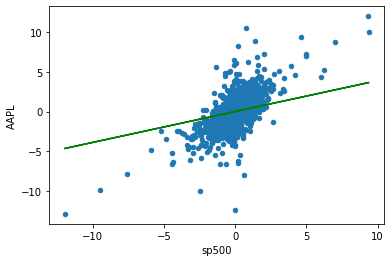

In [44]:
# Lets get plot on scatter plot and straight line plot
stock_daily_return.plot (kind = 'scatter' , x = 'sp500' , y = 'AAPL')
## Straight Line equation y = beta * rm + alpha
plt.plot(stock_daily_return['sp500'],beta * stock_daily_return['sp500'] + alpha , '-' , color = 'g')

## Apply CAPM formula in individual stock 

In [45]:
# Lets calculate the annualize rate of return on s&p500
# Note that out of 365 days, stock exchange are close for  113 days due to  holiday and weekend 
rm = stock_daily_return ['sp500'].mean() * 252
rm

12.42763366329808

In [46]:
# Assume the risk free rate is 0
# Also we can take 10 years US govt bond for  risk free rate
rf = 0
# Calculate  return for any security (APPL) using CAPM
ER_AAPL = rf + (beta * (rm - rf))
ER_AAPL

4.824919914606068

## CALCULATE BETA FOR ALL STOCKS

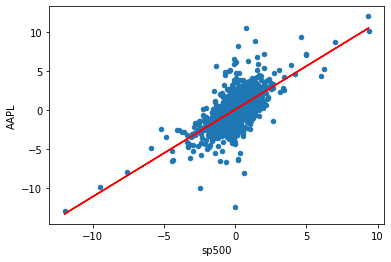

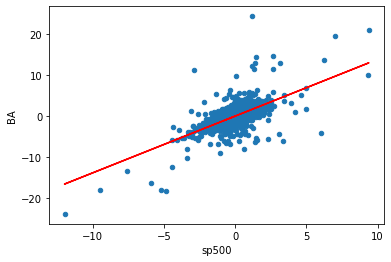

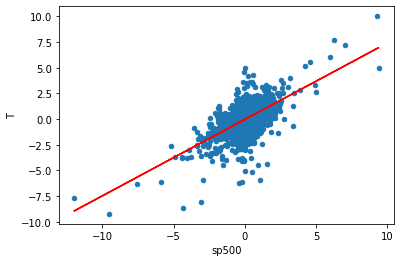

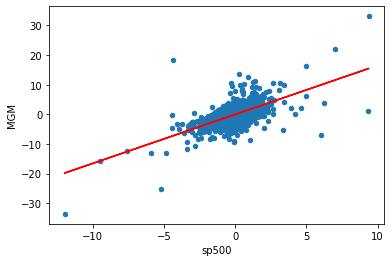

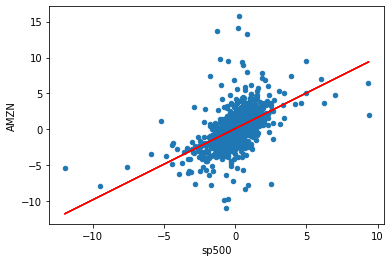

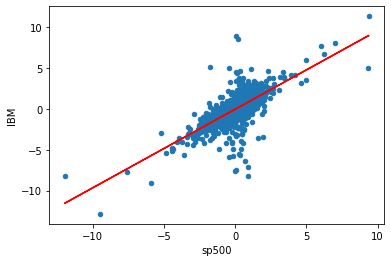

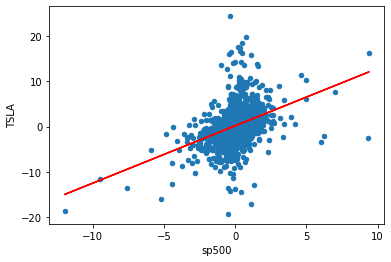

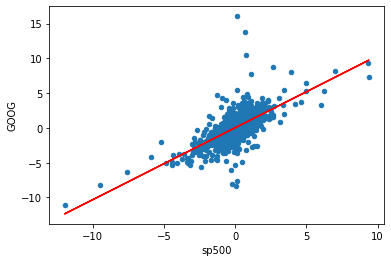

In [47]:
beta = {}
alpha = {}
for i in stock_daily_return.columns:
    if i != 'Date' and i != 'sp500':
        
        stock_daily_return.plot (kind = 'scatter', x = 'sp500', y = i )
        b,a = np.polyfit(stock_daily_return['sp500'] , stock_daily_return [i] , 1)
        plt.plot (stock_daily_return['sp500'], b * stock_daily_return['sp500'] + a , '-' , color = 'red')
        
        beta[i] = b
        alpha[i] = a
        
        plt.show()

In [48]:
### Lets view beta for every stock
beta

{'AAPL': 1.11289241486781,
 'BA': 1.382867201089278,
 'T': 0.7446293454747845,
 'MGM': 1.6535677065180123,
 'AMZN': 0.9917345712576845,
 'IBM': 0.9604149148095246,
 'TSLA': 1.2686150101095912,
 'GOOG': 1.034881768742856}

In [49]:
### Lets view alpha for every stock
alpha

{'AAPL': 0.05281208469440287,
 'BA': -0.002290698329753175,
 'T': -0.028563430198461675,
 'MGM': -0.016885305520478608,
 'AMZN': 0.10221396417765237,
 'IBM': -0.053454941504451015,
 'TSLA': 0.17583492165165865,
 'GOOG': 0.03335558721467021}

### using the plotly express , plot, interactive the plot showing s&p500 vs every stock
### plot the best fil straight line for alpha and bita value

In [50]:
for i in stock_daily_return.columns:
    if i != 'Date' and i != 'sp500':
        
        fig = px.scatter (stock_daily_return,x = 'sp500', y = i , title = i)
        b,a = np.polyfit(stock_daily_return['sp500'], stock_daily_return[i], 1)
        fig.add_scatter (x = stock_daily_return['sp500'] , y = b * stock_daily_return['sp500'] + a)
        fig.show()